In [304]:
from sklearn.datasets import make_blobs, make_circles, make_classification, fetch_openml
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd
import time

# Классная работа

## Линейно разделимые данные

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

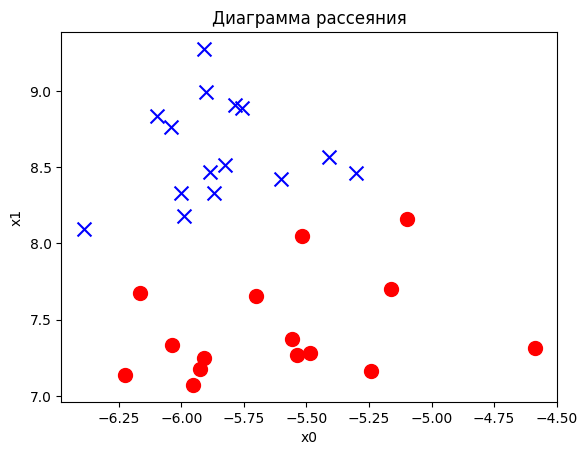

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [ ]:
svm_linear.coef_,svm_linear.intercept_

(array([[-2.49920793,  6.14683189]]), array([-64.2533988]))

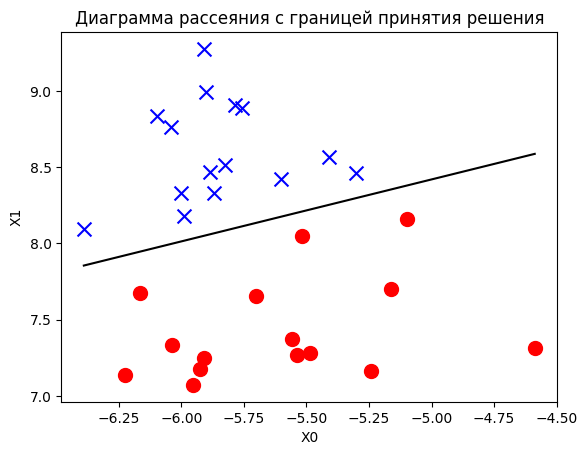

In [ ]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [ ]:
svm_linear.n_support_

array([1, 2], dtype=int32)

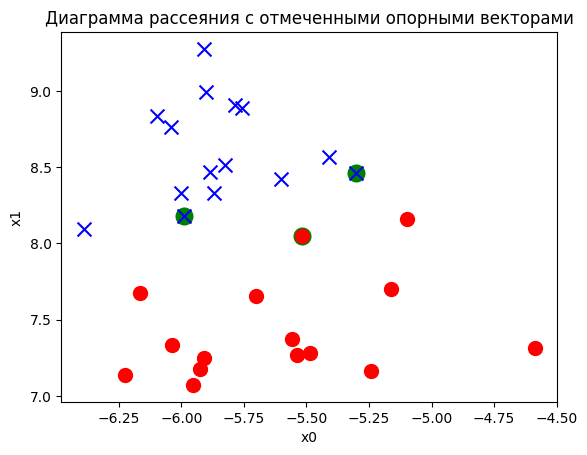

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

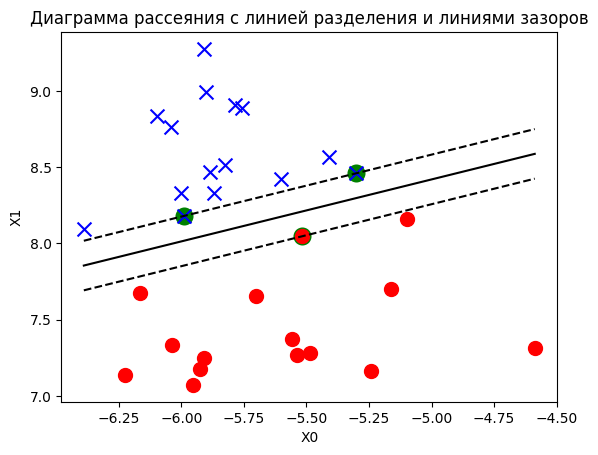

In [ ]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

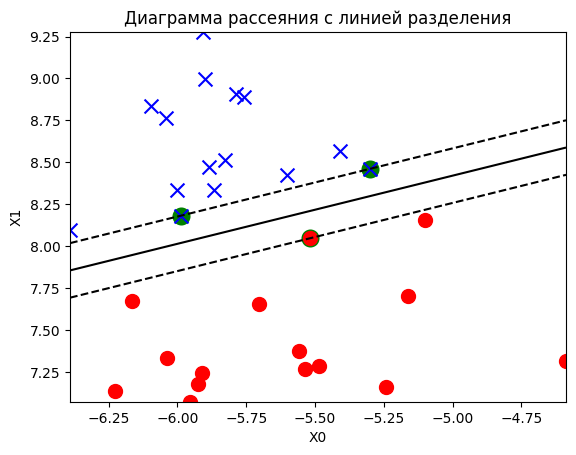

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [5]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [ ]:
y_pred =  svm_linear.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new = [[-5.25, 7.5]]

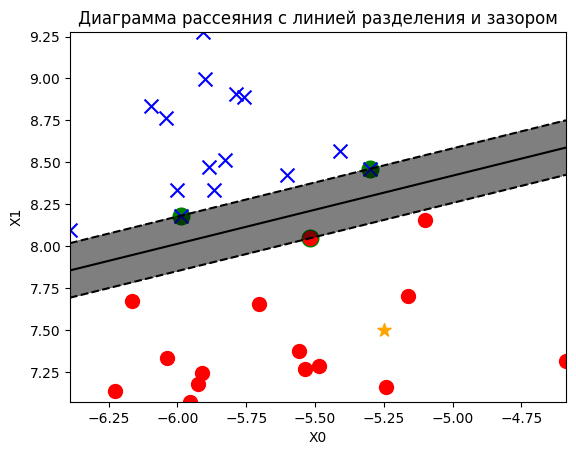

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [ ]:
svm_linear.predict(observation_new)

array([0])

## Линейно неразделимые данные с зазором

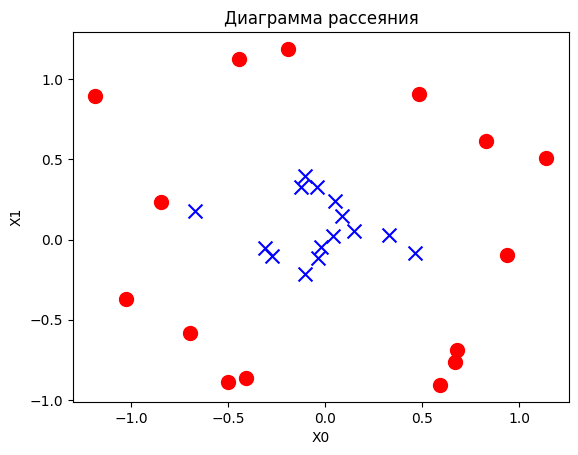

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [ ]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

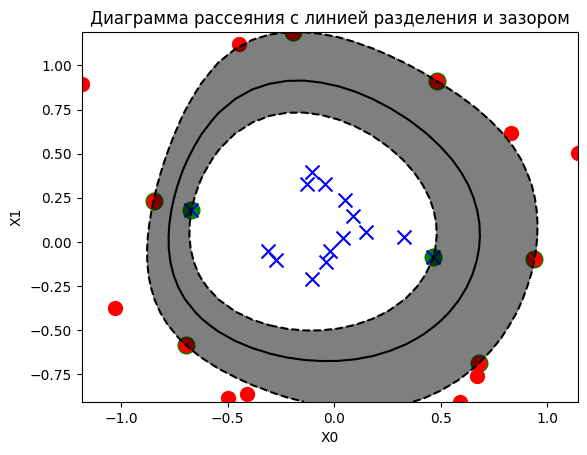

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
y_pred = svm_rbf.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

## Данные без зазора

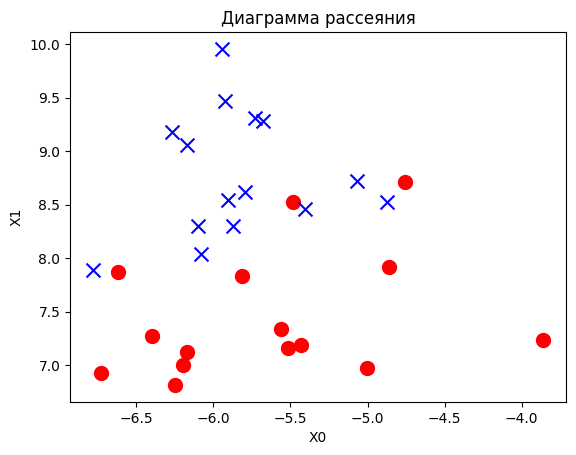

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

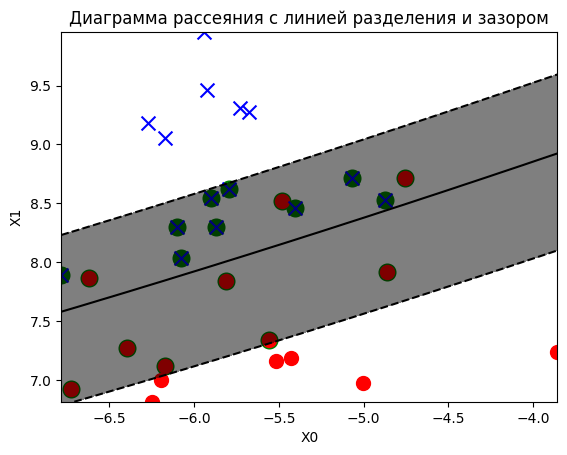

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [ ]:
y_pred = svm_poly.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

# Домашняя работа

## 1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

In [ ]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X, y)

SVC(C=1, kernel='linear')

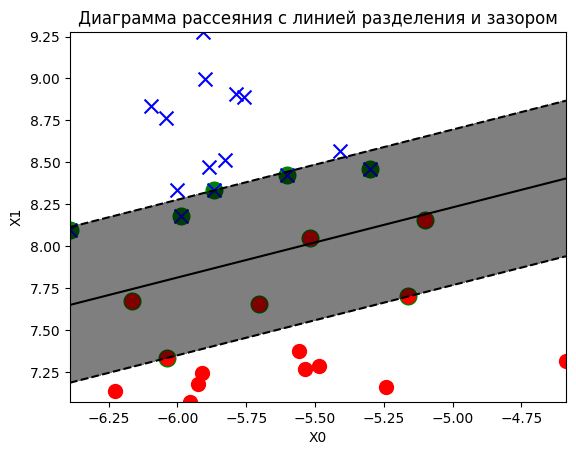

In [ ]:
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear = SVC(kernel='linear', C=200)
svm_linear.fit(X, y)

SVC(C=200, kernel='linear')

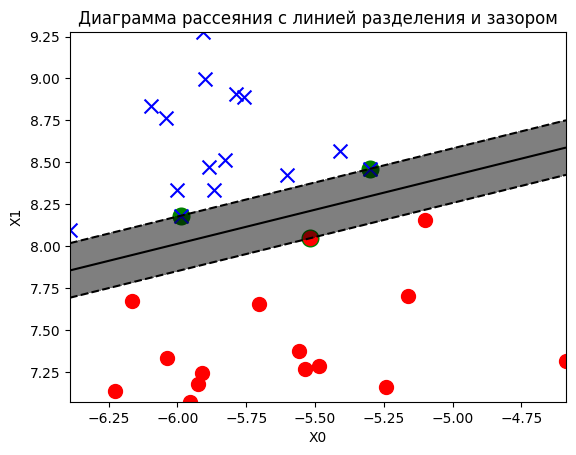

In [ ]:
plot_decision_regions(X, y, svm_linear)

## 2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

In [ ]:
observation_new = [[-6, 9]]

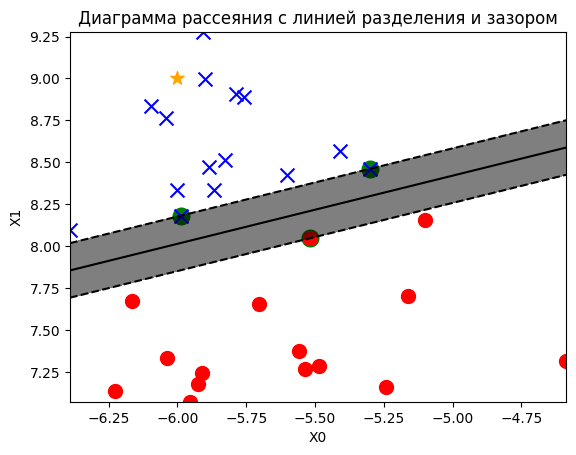

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.decision_function(observation_new)

array([6.06333582])

In [ ]:
svm_linear.predict(observation_new)

array([1])

In [ ]:
observation_new = [[-5.5, 8.2]]

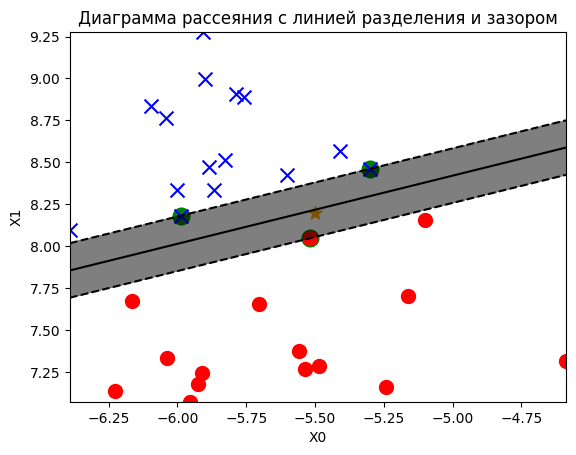

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.decision_function(observation_new)

array([-0.10373366])

In [ ]:
svm_linear.predict(observation_new)

array([0])

## 3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

In [ ]:
svm_rbf = SVC(kernel='sigmoid', C=14).fit(X, y)

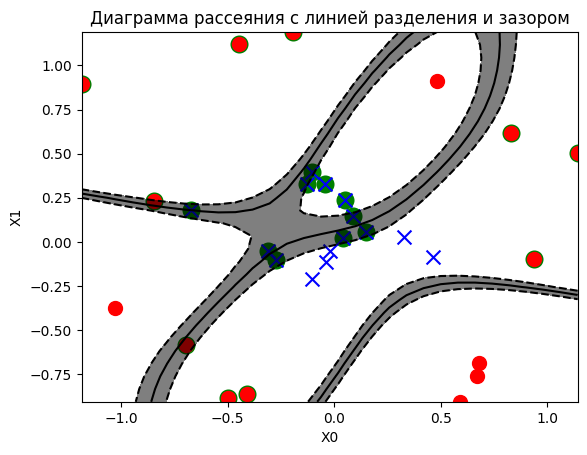

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
svm_rbf = SVC(kernel='poly', degree=2, C=100).fit(X, y)

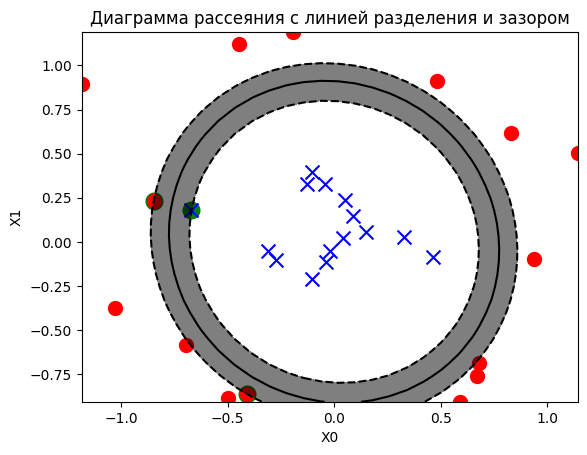

In [ ]:
plot_decision_regions(X, y, svm_rbf)

## 4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=100).fit(X, y)

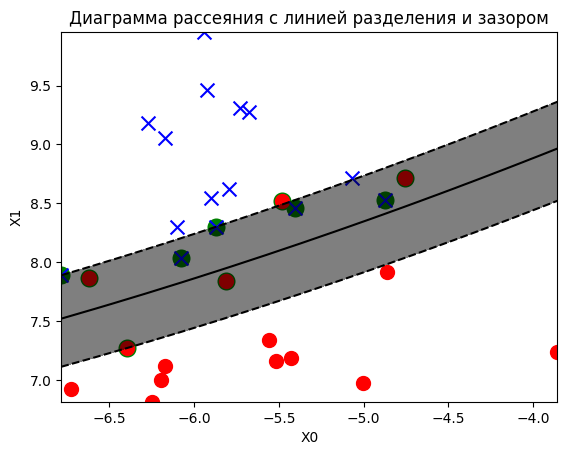

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=3000).fit(X, y)

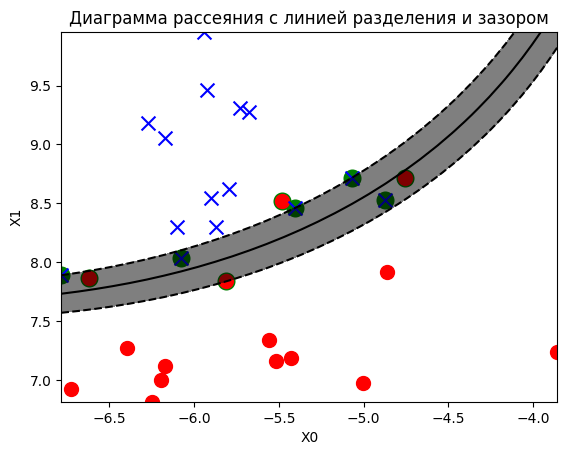

In [ ]:
plot_decision_regions(X, y, svm_poly)

## 5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

In [28]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

In [29]:
svm_lin = SVC(kernel='linear', C=2).fit(X, y)

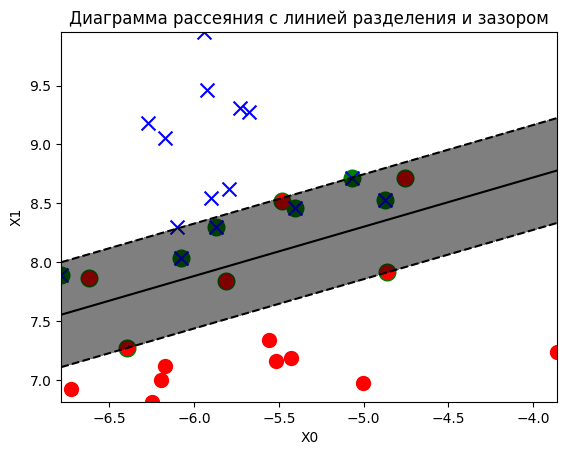

In [30]:
plot_decision_regions(X, y, svm_lin)

In [22]:
svc_lin = LinearSVC(C=10)

In [23]:
svc_lin.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10)

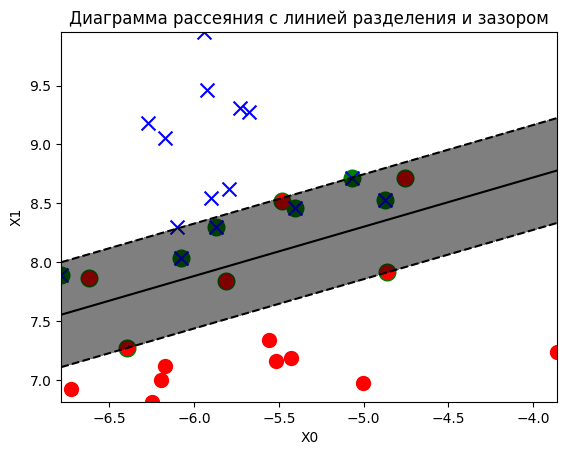

In [24]:
plot_decision_regions(X, y, svm_lin)

## 6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [89]:
X, y = make_classification(n_features=5, n_samples=1000, random_state=5)
X[:5]

array([[ 0.54918438, -0.35679769, -0.08638331,  0.24126668,  0.44672208],
       [ 2.30465689, -1.75553667, -0.47798871,  1.03226247,  0.3713065 ],
       [-1.16622215, -0.92276848, -0.56805003, -0.38359293,  0.08174375],
       [ 1.53253907, -1.33747713, -0.39391377,  0.69946028, -0.01679373],
       [ 0.11009944, -0.59760319, -0.25257581,  0.08867446,  0.61537124]])

In [90]:
stats = {'linear':[], 'poly':[], 'rbf':[]}

In [91]:
max_ac = 0
for i in range(1, 101):
  svm = SVC(kernel='linear', C=i).fit(X, y)
  ac = round(metrics.accuracy_score(y, svm.predict(X)), 4)
  if max_ac < ac:
    max_ac = ac
    best_C = i
stats['linear'].append(max_ac)
stats['linear'].append(best_C)
max_ac, best_C

(0.913, 2)

In [92]:
max_ac = 0
for i in range(1, 101):
  svm = SVC(kernel='poly', degree=4, C=i).fit(X, y)
  ac = round(metrics.accuracy_score(y, svm.predict(X)), 4)
  if max_ac < ac:
    max_ac = ac
    best_C = i
stats['poly'].append(max_ac)
stats['poly'].append(best_C)
max_ac, best_C

(0.606, 1)

In [94]:
max_ac = 0
for i in range(1, 101):
  svm = SVC(kernel='rbf', C=i).fit(X, y)
  ac = round(metrics.accuracy_score(y, svm.predict(X)), 4)
  if max_ac < ac:
    max_ac = ac
    best_C = i
stats['rbf'].append(max_ac)
stats['rbf'].append(best_C)
max_ac, best_C

(0.939, 59)

In [95]:
pd.DataFrame(stats, index=['Accuracy', 'C'])

,linear,poly,rbf
Accuracy,0.913,0.606,0.939
C,2.000,1.000,59.000


## 7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [134]:
time_stat = {'time':[]}

In [135]:
for i in [1000, 2000, 5000, 10000, 20000, 40000]:
  X, y = make_classification(n_features=5, n_samples=i, random_state=5)
  start = time.time()
  svm = SVC(kernel='rbf', C=59).fit(X, y)
  t = time.time() - start
  time_stat['time'].append(t)

In [136]:
pd.DataFrame(time_stat, index=[1000, 2000, 5000, 10000, 20000, 40000])

,time
1000,0.043063
2000,0.039318
5000,0.532155
10000,2.176857
20000,6.472865
40000,19.698781


# 8.Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

In [305]:
X, y = make_classification(n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=4,
                          class_sep=3,
                          n_clusters_per_class = 1,
                          random_state=1)
X[:5]

array([[ 2.86341137,  1.08764555],
       [-2.53099717,  2.90118241],
       [-1.01722404, -3.59111159],
       [-3.03203853, -2.80116218],
       [ 5.6205548 ,  1.90112355]])

In [306]:
y1 = np.where(y == 0, 1, 0)
svm_lin1 = SVC(kernel='linear', C=2)
svm_lin1.fit(X, y1)
X0_1 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1_1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

In [307]:
y2 = np.where(y == 1, 1, 0)
svm_lin2 = SVC(kernel='linear', C=2)
svm_lin2.fit(X, y2)
X0_2 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1_2 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

In [308]:
y3 = np.where(y == 2, 1, 0)
svm_lin3 = SVC(kernel='linear', C=2)
svm_lin3.fit(X, y3)
X0_3 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1_3 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

In [309]:
y4 = np.where(y == 3, 1, 0)
svm_lin4 = SVC(kernel='linear', C=2)
svm_lin4.fit(X, y4)
X0_4 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1_4 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

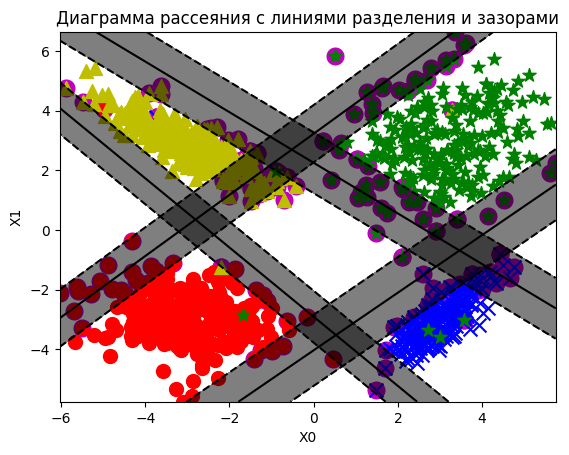

In [310]:
plt.scatter(svm_lin1.support_vectors_[:, 0], svm_lin1.support_vectors_[:, 1], linewidth=7, facecolors='m')
plt.scatter(svm_lin2.support_vectors_[:, 0], svm_lin2.support_vectors_[:, 1], linewidth=7, facecolors='m')
plt.scatter(svm_lin3.support_vectors_[:, 0], svm_lin3.support_vectors_[:, 1], linewidth=7, facecolors='m')
plt.scatter(svm_lin4.support_vectors_[:, 0], svm_lin4.support_vectors_[:, 1], linewidth=7, facecolors='m')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], marker="^", c='y', s=100)
plt.scatter(X[:, 0][y==3], X[:, 1][y==3], marker="*", c='g', s=100)

X0_1_grid, X1_1_grid = np.meshgrid(X0_1, X1_1)
X0_2_grid, X1_2_grid = np.meshgrid(X0_2, X1_2)
X0_3_grid, X1_3_grid = np.meshgrid(X0_3, X1_3)
X0_4_grid, X1_4_grid = np.meshgrid(X0_4, X1_4)

Z1 = svm_lin1.decision_function(np.array([X0_1_grid.ravel(), X1_1_grid.ravel()]).T).reshape(X0_1_grid.shape)
Z2 = svm_lin2.decision_function(np.array([X0_2_grid.ravel(), X1_2_grid.ravel()]).T).reshape(X0_2_grid.shape)
Z3 = svm_lin3.decision_function(np.array([X0_3_grid.ravel(), X1_3_grid.ravel()]).T).reshape(X0_3_grid.shape)
Z4 = svm_lin4.decision_function(np.array([X0_4_grid.ravel(), X1_4_grid.ravel()]).T).reshape(X0_4_grid.shape)

plt.contour(X0_1_grid, X1_1_grid, Z1, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contourf(X0_1_grid, X1_1_grid, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5)

plt.contour(X0_2_grid, X1_2_grid, Z2, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contourf(X0_2_grid, X1_2_grid, Z2, colors='k', levels=[-1, 0, 1], alpha=0.5)

plt.contour(X0_3_grid, X1_3_grid, Z3, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contourf(X0_3_grid, X1_3_grid, Z3, colors='k', levels=[-1, 0, 1], alpha=0.5)

plt.contour(X0_4_grid, X1_4_grid, Z4, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contourf(X0_4_grid, X1_4_grid, Z4, colors='k', levels=[-1, 0, 1], alpha=0.5)

plt.title("Диаграмма рассеяния c линиями разделения и зазорами")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

# 9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [311]:
data = fetch_openml('monks-problems-2')
data.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [312]:
X = data['data']
y = data['target']
X

,attr1,attr2,attr3,attr4,attr5,attr6
0,1,1,1,1,2,2
1,1,1,1,1,4,1
2,1,1,1,2,1,1
3,1,1,1,2,1,2
4,1,1,1,2,2,1
...,...,...,...,...,...,...
596,3,3,2,3,2,2
597,3,3,2,3,3,1
598,3,3,2,3,3,2
599,3,3,2,3,4,1


In [299]:
svm_lin = SVC(kernel='linear', C=10).fit(X, y)

In [300]:
svm_lin.coef_,svm_lin.intercept_

(array([[-8.39889617e-06, -7.91326056e-06,  6.87799543e-05,
         -8.61850958e-05,  2.96150756e-06, -9.09494702e-13]]),
 array([-0.99992341]))

In [301]:
ac = metrics.accuracy_score(y, svm_lin.predict(X))
print(f'accuracy = {ac:.2f}')

accuracy = 0.66


In [317]:
svm_poly = SVC(kernel='poly', degree=4, C=4).fit(X, y)

In [318]:
ac = metrics.accuracy_score(y, svm_poly.predict(X))
print(f'accuracy = {ac:.2f}')

accuracy = 0.91


# 10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [284]:
X = np.array(X)

In [285]:
logreg = LogisticRegression()

In [286]:
logreg.fit(X, y)

LogisticRegression()

In [287]:
logreg.coef_,logreg.intercept_

(array([[0.18594518, 0.15252409, 0.0401283 , 0.23387344, 0.07187338,
         0.19328333]]),
 array([-2.33991702]))

In [288]:
ac = metrics.accuracy_score(y, logreg.predict(X))
print(f'accuracy = {ac:.2f}')

accuracy = 0.65
